In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import time

import dataset
import myModels
import Metrics
import LossFn

plt.style.use('science')
plt.rcParams['text.usetex'] = False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

C:\Users\asus\.conda\envs\myTorch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\asus\.conda\envs\myTorch_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
params = {
    'paths': os.path.abspath(os.path.join(os.getcwd(),'..')) + '/Datas/Thermal/',
    'inputs_FileName': ['Strains-50-1.xlsx','Strains-50-2.xlsx','Strains-100-1.xlsx','Strains-100-2.xlsx','Strains-120-1.xlsx'],
    'outputs_FileName': ['Loads-50-1.xlsx','Loads-50-2.xlsx','Loads-100-1.xlsx','Loads-100-2.xlsx','Loads-120-1.xlsx'],
    'SampleStride': [1,1,10,10,5],
    'seq_len': 100,
    'input_size': 14,
    'output_size': 6,
    'state':True,
    'Mask':True,
    'Robust_loss':False,
    'Noise_level': 0.0,
    'batch_size': 32,
    'lstm_layers': [50,50],
    'TCN_layers':[25, 50, 50],
    'kernel_size':3,
    'dropout':0.1,
    'Epoches': 1500,
    'lr':0.001,
    'dis_interval':1000,
    'plot_loss':True,
    'device':device,
}


In [4]:
Data_set = dataset.MyDataset(params)
test_size = int(len(Data_set)*0.1)
train_set, test_set = torch.utils.data.random_split(Data_set, [len(Data_set) - test_size, test_size])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=params['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_size, shuffle=True)

In [77]:
labels = 0
start = 0
index  = 3
end = None
params['state'] = True
models_LSTM_TCN = torch.load('LSTM_TCN-1.pt')
Truths,LSTM_TCN = myModels.predict_varylength(models_LSTM_TCN,params,labels,start,end,mask=False)
print ('RI-VLTSNet--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],LSTM_TCN[:,index])))
print ('RI-VLTSNet--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],LSTM_TCN[:,index])))
print ('=========================================================================')

params['state'] = True
models_CNN = torch.load('CNN.pt')
Truths,CNN = myModels.predict_varylength(models_CNN,params,labels,start,end,mask=False)
print ('CNN--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],CNN[:,index])))
print ('CNN--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],CNN[:,index])))
print ('CNN--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],CNN[:,index])))
print ('=========================================================================')

params['state'] = True
models_DNN = torch.load('DNN.pt')
Truths,DNN = myModels.predict_varylength(models_DNN,params,labels,start,end,mask=False)
print ('DNN--->RMSE of Test Set: {}'.format(Metrics.rmse(Truths[:,index],DNN[:,index])))
print ('DNN--->MAPE of Test Set: {}'.format(Metrics.mape(Truths[:,index],DNN[:,index])))
print ('DNN--->R2 of Test Set: {}'.format(Metrics.r2_score(Truths[:,index],DNN[:,index])))
print ('=========================================================================')

RI-VLTSNet--->RMSE of Test Set: 0.5716696977615356
RI-VLTSNet--->MAPE of Test Set: 0.9092481806874275
RI-VLTSNet--->R2 of Test Set: 0.9971910638269037
CNN--->RMSE of Test Set: 1.3553725481033325
CNN--->MAPE of Test Set: 2.698427066206932
CNN--->R2 of Test Set: 0.984210480004549
DNN--->RMSE of Test Set: 0.9185039401054382
DNN--->MAPE of Test Set: 1.2111948803067207
DNN--->R2 of Test Set: 0.9927487382665277


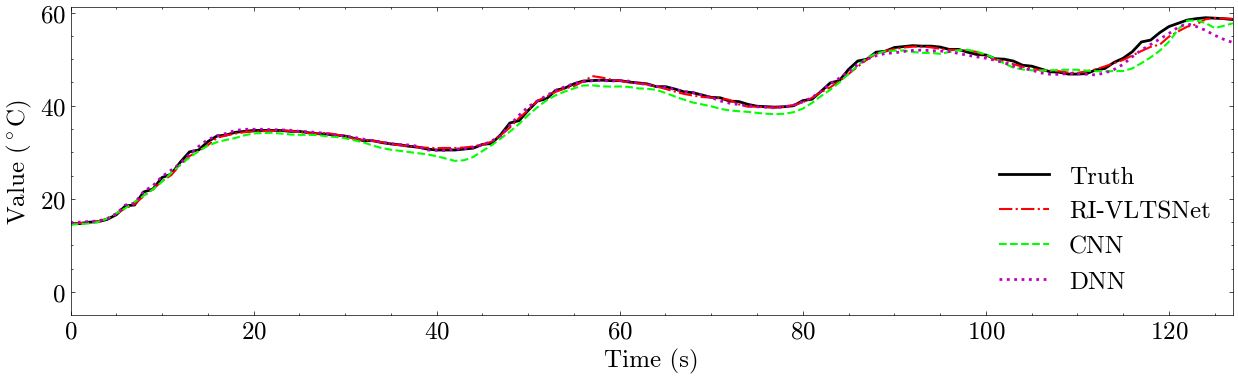

In [84]:
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 18})
# 循环绘制每个子图
plt.plot(Truths[:,index],label='Truth',linestyle='-',linewidth =2,color='black')
plt.plot(LSTM_TCN[:,index],label='RI-VLTSNet',linestyle='-.',linewidth =1.5,color='red')
#plt.plot(LSTM[:,index],label='LSTM',linestyle='-.',linewidth =1.5,color='b')
plt.plot(CNN[:,index],label='CNN',linestyle='--',linewidth =1.5,color='lime')
plt.plot(DNN[:,index],label='DNN',linestyle=':',linewidth =2,color='m')
plt.ylabel('Value ($^\circ\mathrm{C}$)')
plt.xlabel('Time (s)')
plt.xlim(start,127)
#plt.xlim(start,127)
plt.ylim(-5,None)
plt.legend()
plt.show()

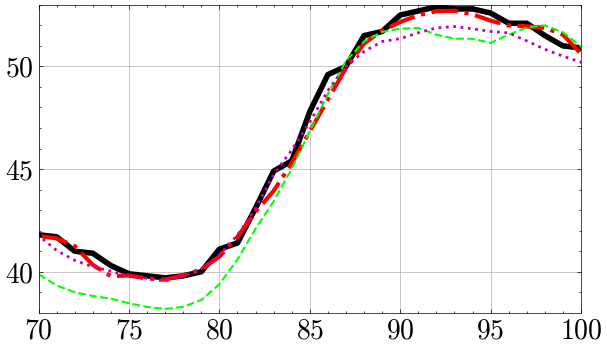

In [40]:
plt.figure(figsize=(7, 4))
plt.rcParams.update({'font.size': 20})
# 循环绘制每个子图
plt.plot(Truths[:,index],label='Truth',linestyle='-',linewidth =4,color='black')
plt.plot(LSTM_TCN[:,index],label='RI-VLTSNet',linestyle='-.',linewidth =3,color='red')
#plt.plot(LSTM[:,index],label='LSTM',linestyle='-.',linewidth =3,color='b')
plt.plot(CNN[:,index],label='CNN',linestyle='--',linewidth =1.5,color='lime')
plt.plot(DNN[:,index],label='DNN',linestyle=':',linewidth =2,color='m')
#plt.ylabel('Value ($^\circ\mathrm{C}$)')
#plt.xlabel('Time (s)')
plt.xlim(70,100)
plt.ylim(38,53)
plt.grid(True)
#plt.legend()
plt.show()

DNN--->RMSE of Test Set: 0.27060943841934204
DNN--->MAPE of Test Set: 67.56812334060669
DNN--->R2 of Test Set: 0.8648796826601028

CNN--->RMSE of Test Set: 0.3933766186237335
CNN--->MAPE of Test Set: 90.99317789077759
CNN--->R2 of Test Set: 0.7144699096679688

LSTM_TCN--->RMSE of Test Set: 0.24601173400878906
LSTM_TCN--->MAPE of Test Set: 57.56809115409851
LSTM_TCN--->R2 of Test Set: 0.8883274421095848


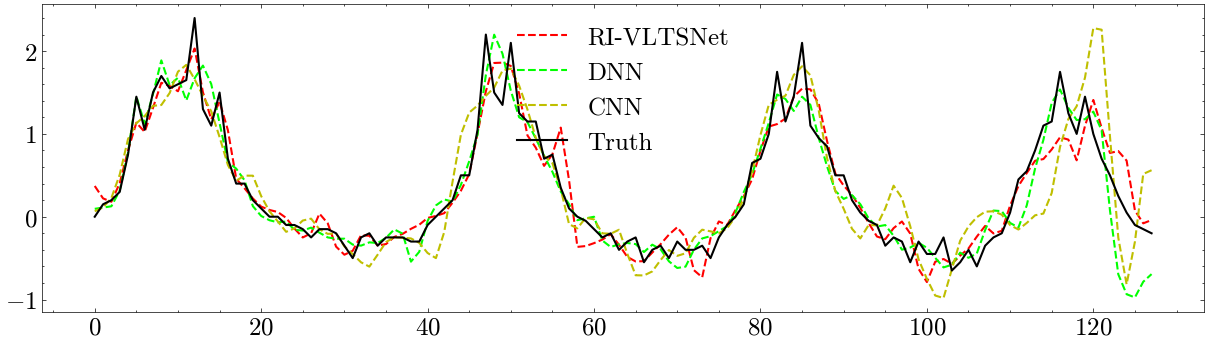

In [83]:
def detivative_t(data):
    t = np.array(range(len(data.cpu().detach().numpy())))
    gradient = np.gradient(data.cpu().detach().numpy(),t)
    return gradient
Truths_gradient = detivative_t(Truths[:,index])
DNN_gradient = detivative_t(DNN[:,index])
CNN_gradient = detivative_t(CNN[:,index])
LSTM_TCN_gradient = detivative_t(LSTM_TCN[:,index])
print ('DNN--->RMSE of Test Set: {}'.format(Metrics.rmse(torch.tensor(Truths_gradient),torch.tensor(DNN_gradient))))
print ('DNN--->MAPE of Test Set: {}'.format(Metrics.mape(torch.tensor(Truths_gradient),torch.tensor(DNN_gradient))))
print ('DNN--->R2 of Test Set: {}'.format(Metrics.r2_score(torch.tensor(Truths_gradient),torch.tensor(DNN_gradient))))
print ()
print ('CNN--->RMSE of Test Set: {}'.format(Metrics.rmse(torch.tensor(Truths_gradient),torch.tensor(CNN_gradient))))
print ('CNN--->MAPE of Test Set: {}'.format(Metrics.mape(torch.tensor(Truths_gradient),torch.tensor(CNN_gradient))))
print ('CNN--->R2 of Test Set: {}'.format(Metrics.r2_score(torch.tensor(Truths_gradient),torch.tensor(CNN_gradient))))
print ()
print ('LSTM_TCN--->RMSE of Test Set: {}'.format(Metrics.rmse(torch.tensor(Truths_gradient),torch.tensor(LSTM_TCN_gradient))))
print ('LSTM_TCN--->MAPE of Test Set: {}'.format(Metrics.mape(torch.tensor(Truths_gradient),torch.tensor(LSTM_TCN_gradient))))
print ('LSTM_TCN--->R2 of Test Set: {}'.format(Metrics.r2_score(torch.tensor(Truths_gradient),torch.tensor(LSTM_TCN_gradient))))


plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 18})

# 绘制折线图
plt.plot(LSTM_TCN_gradient, label='RI-VLTSNet', linestyle='--', linewidth=1.5, color='red')
plt.plot(DNN_gradient, label='DNN', linestyle='--', linewidth=1.5, color='lime')
plt.plot(CNN_gradient, label='CNN', linestyle='--', linewidth=1.5, color='y')
plt.plot(Truths_gradient, label='Truth', linestyle='-', linewidth=1.5, color='black')
plt.legend()

TCN 导数的相关性: 0.942179946597606
LSTM_TCN 导数的相关性: 0.9261063586802669


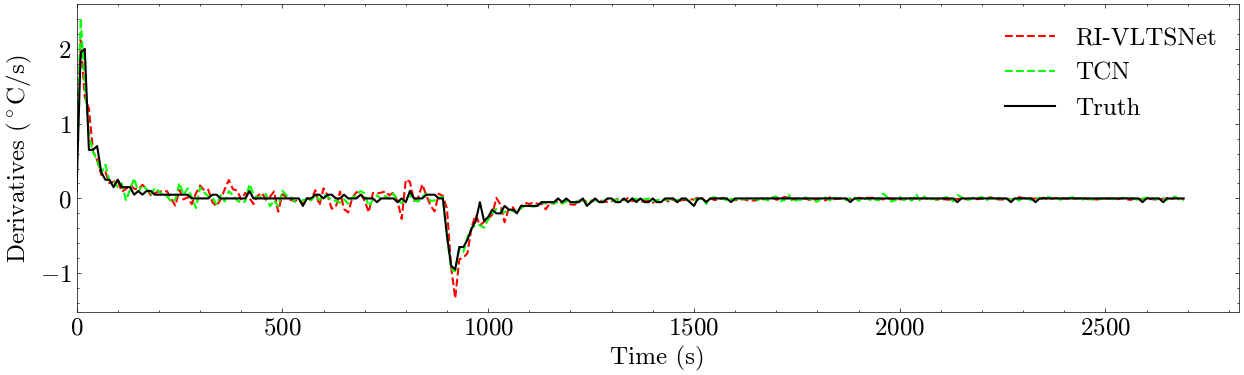

In [76]:
index = 3
Truths_values = Truths[:,index].detach().numpy()
TCN_values = CNN[:,index].detach().numpy()
LSTM_TCN_values = LSTM_TCN[:,index].detach().numpy()
x_values = np.array(range(len(Truths_values)))  # 如果时间点是等间距的
Truths_derivatives = np.gradient(Truths_values, x_values)
TCN_derivatives = np.gradient(TCN_values, x_values)
LSTM_TCN_derivatives = np.gradient(LSTM_TCN_values, x_values)
# 计算两条曲线导数的相关性
TCN_derivative_correlation = np.corrcoef(TCN_derivatives, Truths_derivatives)[0, 1]
print("TCN 导数的相关性:", TCN_derivative_correlation)
LSTM_TCN_derivative_correlation = np.corrcoef(LSTM_TCN_derivatives, Truths_derivatives)[0, 1]
print("LSTM_TCN 导数的相关性:", LSTM_TCN_derivative_correlation)

plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 18})

# 每5个数据点中采集一个点
step = 10
indices = range(0, len(LSTM_TCN_derivatives), step)

# 绘制折线图
plt.plot(indices, LSTM_TCN_derivatives[::step], label='RI-VLTSNet', linestyle='--', linewidth=1.5, color='red')
plt.plot(indices, TCN_derivatives[::step], label='TCN', linestyle='--', linewidth=1.5, color='lime')
plt.plot(indices, Truths_derivatives[::step], label='Truth', linestyle='-', linewidth=1.5, color='black')

# 设置标题和标签
plt.ylabel('Derivatives ($^\circ\mathrm{C}$/s)')
plt.xlabel('Time (s)')
#plt.title('Load$_{2}$')

# 添加图例
plt.legend()

# 设置 x 轴范围
plt.xlim(0, None)

# 显示图形
plt.show()